# SOLAR SYSTEM

Nbody_shi

Direct N-body solver: for each step, the algorithm evaluates the force acted on any particles by all the other particles. RUNNING TIME SCALES AS $N^2$ 

$$G = 1$$
$$\textbf{f}_i=\sum_{j\neq i} \frac{m_im_j}{|\textbf{r}_{ij}|^3}\textbf{r}_{ij}$$

4^th order Hermite algorithm: error scales as dt^4

$$\textbf{x}_{i+1}=\textbf{x}_i+\textbf{v}_idt+\frac{1}{2}\textbf{a}_idt^2+\frac{1}{3!}\textbf{J}_idt^3+\frac{1}{4!}\textbf{S}_idt^4$$

$$\textbf{v}_{i+1}=\textbf{v}_i+\textbf{a}_idt+\frac{1}{2}\textbf{J}_idt^2+\frac{1}{3!}\textbf{S}_idt^3+\frac{1}{4!}\textbf{C}_idt^4$$

$$\textbf{a}_{i+1}=\textbf{a}_i+\textbf{J}_idt+\frac{1}{2}\textbf{S}_idt^2+\frac{1}{3!}\textbf{C}_idt^3+O(dt^4)$$

$$\textbf{J}_{i+1}=\textbf{J}_i+\textbf{S}_idt+\frac{1}{2}\textbf{C}_idt^2+O(dt^3)$$


where $\textbf{J}$ is the jerk, $\textbf{S}$ the snap (jounce), $\textbf{C}$ the crakle. The jerk can be evaluated knowing the position and the velocity vector only: 

$$\textbf{a}_i=\sum_{j\neq i} \frac{m_j}{|\textbf{r}_{ij}|^3}\textbf{r}_{ij}$$
$$\textbf{J}_i=\frac{d}{dt}\textbf{a}_i=\sum_{j\neq i}m_j\left( \frac{\textbf{v}_{ij}}{|\textbf{r}_{ij}|^3}-3\frac{\textbf{r}_{ij}}{|\textbf{r}_{ij}|^4}\frac{d}{dt}|\textbf{r}_{ij}|\right)$$

but $|\textbf{r}_{ij}|=\sqrt{\textbf{r}_{ij}\cdot \textbf{r}_{ij}}$ thus: 

$$\textbf{J}_i=\sum_{j\neq i}\frac{m_j}{|\textbf{r}_{ij}|^3}\left(\textbf{v}_{ij}-3\frac{\textbf{r}_{ij}}{|\textbf{r}_{ij}|}\frac{2(\textbf{v}_{ij}\cdot \textbf{r}_{ij})}{2|\textbf{r}_{ij}|}\right)=\sum_{j\neq i}\frac{m_j}{|\textbf{r}_{ij}|^3}\left(\textbf{v}_{ij}-3\frac{\textbf{r}_{ij}(\textbf{v}_{ij}\cdot \textbf{r}_{ij})}{|\textbf{r}_{ij}|^2}\right)$$


ALGORITHM

Step 1: PREDICTOR evaluates $\textbf{a}_i$ and $\textbf{J}_i$ from initial position and velocity and computes $\textbf{x}_{i+1}$ and $\textbf{v}_{i+1}$ to the order 2. 

Step 2: EVALUATOR computes $\textbf{C}_i$ and $\textbf{S}_i$ inverting the last two equations

Step 3: CORRECTOR computes higher order $\textbf{x}_i+1$ and $\textbf{v}_i+1$ by plugging snap and crakle in the Taylor expansion. 

How to decide $dt$? For each particle the algorithm computes $|\frac{\textbf{x}_{ij}}{\textbf{v}_{ij}}|$ and $|\frac{\textbf{x}_{ij}}{\textbf{a}_{ij}}|^{\frac{1}{2}}$, which are times. Then it takes the minimum between this two and multyplies it by an accuracy parameter $d\ll 1$. A good choice is $d=0.03$.


Algorithm to compute Snap ($\mathbf{S}_i$) and Crackle ($\mathbf{C}_i$):

Step 1: Predictor
$$
\mathbf{x}_{i+1}^{(p)} = \mathbf{x}_i + \mathbf{v}_i dt + \frac{1}{2} \mathbf{a}_i dt^2 + \frac{1}{6} \mathbf{J}_i dt^3
$$
$$
\mathbf{v}_{i+1}^{(p)} = \mathbf{v}_i + \mathbf{a}_i dt + \frac{1}{2} \mathbf{J}_i dt^2
$$

Step 2: Evaluate new acceleration and jerk at predicted positions:
$$
\mathbf{a}_{i+1}, \mathbf{J}_{i+1} \text{ at } \mathbf{x}_{i+1}^{(p)}, \mathbf{v}_{i+1}^{(p)}
$$

Step 3: Compute Snap and Crackle
$$
\mathbf{S}_i = \frac{2}{dt^2} \Big(\mathbf{a}_{i+1} - \mathbf{a}_i - \mathbf{J}_i dt\Big)
$$
$$
\mathbf{C}_i = \frac{6}{dt^3} \Big(\mathbf{J}_{i+1} - \mathbf{J}_i - \mathbf{S}_i dt\Big)
$$

Step 4: Corrector (update positions and velocities to 4th order)
$$
\mathbf{x}_{i+1} = \mathbf{x}_i + \mathbf{v}_i dt + \frac{1}{2} \mathbf{a}_i dt^2 + \frac{1}{6} \mathbf{J}_i dt^3 + \frac{1}{24} \mathbf{S}_i dt^4
$$
$$
\mathbf{v}_{i+1} = \mathbf{v}_i + \mathbf{a}_i dt + \frac{1}{2} \mathbf{J}_i dt^2 + \frac{1}{6} \mathbf{S}_i dt^3 + \frac{1}{24} \mathbf{C}_i dt^4
$$

This yields 4th-order accurate updates for the N-body system.


### ADAPTIVE TIMESTEP

The adaptive timestep for particle $i$ can be estimated using the Aarseth criterion:
$$
\Delta t_i
=
\eta
\sqrt{
\frac{
|\mathbf a_i|\,|\mathbf{\ddot a}_i| + |\mathbf{\dot a}_i|^2
}{
|\mathbf{\dot a}_i|\,|\mathbf{\ddot a}_i| + |\mathbf{\ddot a}_i|^2
}
}
$$
where $\mathbf a_i$ is the acceleration and $\mathbf{\dot a}_i$ is the jerk. $\eta\sim 0.01–0.2$ controls accuracy.

A commonly used simplified form is:
$$
\Delta t_i
=
\eta
\sqrt{
\frac{|\mathbf a_i|}{|\mathbf{\dot a}_i|}
}
$$

An alternative adaptive timestep based on the local dynamical time is:
$$
\Delta t_i
\sim
\eta
\sqrt{
\frac{r_i}{|\mathbf a_i|}
}
$$
The timestep is a fraction of the orbital or free-fall timescale.
This can also be expressed in terms of the local density:
$$
\Delta t_i
\sim
\eta\, t_{\mathrm{dyn}},
\qquad
t_{\mathrm{dyn}}
\sim
\frac{1}{\sqrt{G\rho}}.
$$
A weaker constraint on the timestep is the Courant-like criterion:
$$
\Delta t_i
<
\eta
\frac{|\mathbf v_i|}{|\mathbf a_i|}.
$$


# GLOBAL ADAPTIVE VS LOCAL ADAPTIVE: Individual block (hierarchical) timesteps using the Aarseth acceleration–jerk criterion

A global adaptive timestep is not a good choice for a 4th-order Hermite N-body code because it is fundamentally mismatched to the physics and numerics of gravitational N-body systems. In one simulation you typically have, simultaneously:
- Wide, slow orbits
- Tight binaries
- Close encounters / flybys

The shortest timescale sets the global timestep: $\Delta t_\text{global}\leq \min ⁡\Delta t_i$. One tight binary forces every particle to take tiny steps, and cost scales catastrophically: $CPU\propto T_\text{sim}/\Delta t_\text{min} N^2$. Most particles are vastly over-integrated.

Hermite integrators are instead local in nature. Each particle advances on its own optimal timescale.
Using a global timestep wastes the local force information and negates the main advantage of Hermite integrators.


When is a global timestep acceptable?
- Collisionless systems
- No close encounters
- Symplectic integrators (leapfrog)
- Softened gravity
- Nearly uniform timescales


In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass, field
from tqdm import tqdm


In [2]:
### --- UNITS --- ###


G_cgs = 6.67259 * 10**-8         # G in cgs
c_cgs = 2.99 * 10**10            # cm/s
M_sun = 1.9891 * 10**33      # solar mass in g
R_sun = 6.9598 * 10**10      # solar radius in cm 
M_earth = 5.976 * 10**27     # earth mass in g
R_earth = 6.378 * 10**8      # earth radius in cm
ly = 9.463 * 10**17          # light year in cm
parsec = 3.086 * 10**18      # parsec in cm
AU = 1.496 * 10**13          # astronomical unit in cm
km = 1.e5
hour = 3600
day = 86400
yr = 3.156*10**7

# G = 1
# mass in M_sun units
# length in AU units

# --- Internal units ---
M_unit = M_sun
L_unit = AU

T_unit = np.sqrt(L_unit**3 / (G_cgs * M_unit))  # seconds

def length_IU(cm):
    return cm / L_unit

def length_cgs(x):
    return x * L_unit

def mass_IU(g):
    return g / M_unit

def mass_cgs(x):
    return x * M_unit

def time_IU(s):
    return s / T_unit

def time_cgs(x):
    return x * T_unit

In [3]:
year_IU = time_IU(31557600)
day_IU = time_IU(86400)

In [4]:
day_IU

0.017202512457352787

In [5]:
@dataclass
class Body:
    name: str = None
    mass: float = None
    radius: float = None
    initial_position: np.ndarray = None
    initial_velocity: np.ndarray = None

    def __post_init__(self):
        self.initial_position = np.asarray(self.initial_position, dtype=float)
        self.initial_velocity = np.asarray(self.initial_velocity, dtype=float)

        if self.initial_position.shape != (3,):
            raise ValueError("initial_position must be a 3-element array")

        if self.initial_velocity.shape != (3,):
            raise ValueError("initial_velocity must be a 3-element array")

        self.x = [self.initial_position.copy()]
        self.v = [self.initial_velocity.copy()]
        
        self.t = []

        self.K = []
        self.U = []



In [118]:
def make_binary_system(m_1, m_2, a, e, i, phi):

    if m_1 == 0 and m_2 == 0:
        raise ValueError("At least one body must have non-zero mass")

    # --------------------------------------------------
    # Rotation matrix (define ONCE)
    # --------------------------------------------------
    cphi, sphi = np.cos(phi), np.sin(phi)
    ci, si = np.cos(i), np.sin(i)

    R = np.array([
        [ cphi,       -sphi,        0.0 ],
        [ ci*sphi,    ci*cphi,     -si  ],
        [ si*sphi,    si*cphi,      ci  ]
    ])

    # --------------------------------------------------
    # Pericenter state (relative orbit)
    # --------------------------------------------------
    r_peri = a * (1 - e)
    r_rel = np.array([r_peri, 0.0, 0.0])

    # --------------------------------------------------
    # TEST PARTICLE CASE
    # --------------------------------------------------
    if m_1 == 0 or m_2 == 0:

        M = max(m_1, m_2)

        # vis-viva at periapsis
        v_rel_mag = np.sqrt(M * (1 + e) / (a * (1 - e)))
        v_rel = np.array([0.0, v_rel_mag, 0.0])

        r_rel = R @ r_rel
        v_rel = R @ v_rel

        if m_1 > 0:
            body_massive = Body(
                mass=m_1,
                initial_position=np.zeros(3),
                initial_velocity=np.zeros(3)
            )
            body_test = Body(
                mass=0.0,
                initial_position=r_rel,
                initial_velocity=v_rel
            )
        else:
            body_massive = Body(
                mass=m_2,
                initial_position=np.zeros(3),
                initial_velocity=np.zeros(3)
            )
            body_test = Body(
                mass=0.0,
                initial_position=r_rel,
                initial_velocity=v_rel
            )

        return body_massive, body_test

    # --------------------------------------------------
    # TRUE BINARY CASE
    # --------------------------------------------------
    M = m_1 + m_2

    # relative speed at periapsis
    v_rel_mag = np.sqrt(M * (1 + e) / (a * (1 - e)))
    v_rel = np.array([0.0, v_rel_mag, 0.0])

    # Split into CM frame
    r_1 =  (m_2 / M) * r_rel
    r_2 = -(m_1 / M) * r_rel

    v_1 =  (m_2 / M) * v_rel
    v_2 = -(m_1 / M) * v_rel

    # Rotate
    r_1 = R @ r_1
    r_2 = R @ r_2
    v_1 = R @ v_1
    v_2 = R @ v_2

    body_1 = Body(mass=m_1, initial_position=r_1, initial_velocity=v_1)
    body_2 = Body(mass=m_2, initial_position=r_2, initial_velocity=v_2)

    return body_1, body_2



In [119]:


def compute_acc_and_jerk(b, bodies):
    """Compute acceleration and jerk on body b from bodies."""
    a = np.zeros(3)
    j = np.zeros(3)

    for bb in bodies:
        if bb is b:
            continue
        if bb.mass == 0:
            continue

        r = bb.x[-1] - b.x[-1]
        v = bb.v[-1] - b.v[-1]

        r2 = np.dot(r, r)
        r1 = np.sqrt(r2)
        r3 = r2 * r1

        a += bb.mass * r / r3
        j += bb.mass * (v / r3 - 3.0 * r * np.dot(r, v) / (r2 * r3))

    return a, j


def evolve_system(bodies, time, dt=None, adapt_dt=True, eta=0.03):
    """
    4th-order Hermite integrator with global adaptive timestep.
    If a body has mass zero, it's gravitational influence is null. It just moves in the potential
    """

    # Initial energies
    for b in bodies:
        if not b.K:
            b.K.append(0.5 * b.mass * np.linalg.norm(b.v[-1])**2)

        if not b.U:
            U = 0
            for bb in bodies:
                if bb is not b:
                    U += -bb.mass * b.mass / np.linalg.norm(b.x[-1] - bb.x[-1])
            b.U.append(U)
            
        if not b.t:
            b.t.append(0)

    if not adapt_dt and dt is None:
        raise ValueError("Provide dt when adapt_dt=False")

    t = 0.0
    eps = 1e-12

    # --- tqdm progress bar (time-based) ---
    pbar = tqdm(total=time, unit="time", desc="Evolving system",leave=True)

    while t < time:

        # --------------------------------------------------
        # STEP 0: choose global timestep
        # --------------------------------------------------
        if adapt_dt:
            dt = np.inf
            for b in bodies:
                a, j = compute_acc_and_jerk(b, bodies)
                a_norm = np.linalg.norm(a)
                j_norm = np.linalg.norm(j)

                if j_norm > 0:
                    dt_i = eta * np.sqrt(a_norm / (j_norm + eps))
                    dt = min(dt, dt_i)

        # Prevent overshoot of final time
        if t + dt > time:
            dt = time - t

        
        # --------------------------------------------------
        # STEP 1: predictor
        # --------------------------------------------------
        for b in bodies:
            b.a, b.j = compute_acc_and_jerk(b, bodies)

            b.x_pred = b.x[-1] + b.v[-1] * dt + 0.5 * b.a * dt**2 + (1/6) * b.j * dt**3
            b.v_pred = b.v[-1] + b.a * dt + 0.5 * b.j * dt**2

        # --------------------------------------------------
        # STEP 2: evaluate forces at predicted positions
        # --------------------------------------------------
        for b in bodies:
            a_new = np.zeros(3)
            j_new = np.zeros(3)

            for bb in bodies:
                if bb is b:
                    continue
                if bb.mass == 0:
                    continue

                r = bb.x_pred - b.x_pred
                v = bb.v_pred - b.v_pred

                r2 = np.dot(r, r)
                r1 = np.sqrt(r2)
                r3 = r2 * r1

                a_new += bb.mass * r / r3
                j_new += bb.mass * (v / r3 - 3 * r * np.dot(r, v) / (r2 * r3))

            b.a_new = a_new
            b.j_new = j_new

        # --------------------------------------------------
        # STEP 3: snap and crackle
        # --------------------------------------------------
        for b in bodies:
            b.s = (2 / dt**2) * (b.a_new - b.a - b.j * dt)
            b.c = (6 / dt**3) * (b.j_new - b.j - b.s * dt)

        # --------------------------------------------------
        # STEP 4: corrector
        # --------------------------------------------------
        for b in bodies:
            x_new = b.x_pred + (1 / 24) * b.s * dt**4
            v_new = b.v_pred + (1 / 6) * b.s * dt**3 + (1 / 24) * b.c * dt**4
        
            b.x.append(x_new)
            b.v.append(v_new)
            b.t.append(b.t[-1] + dt)


        
        # Energies
        for b in bodies:
            b.K.append(0.5 * b.mass * np.linalg.norm(b.v[-1])**2)

            U = 0
            for bb in bodies:
                if bb is not b:
                    U += -bb.mass * b.mass / np.linalg.norm(b.x[-1] - bb.x[-1])
            b.U.append(U)

        # Advance time + progress bar
        t += dt
        pbar.update(dt)

    pbar.close()











# Star mass
M = 1 #0.01

def kepler_potential(x):
    return - M / np.linalg.norm(x)

def kepler_field(x): 
    return - M / np.linalg.norm(x)**3 * x

def kepler_hessian(x):
    r2 = np.dot(x, x)
    r = np.sqrt(r2)
    r3 = r2 * r
    r5 = r3 * r2
    I = np.eye(3)
    return M * (I / r3 - 3.0 * np.outer(x, x) / r5)
    

def evolve_in_fixed_potential(bodies, potential, field, hessian, time, dt=None, adapt_dt=True, eta=0.03):
    """
    4th-order Hermite integrator with global adaptive timestep.
    PARTICLES FEEL A FIXED POTENTIAL. COLLISIONLESS CODE
    """
    
    # Initial energies
    for b in bodies:
        if not b.K:
            b.K.append(0.5 * b.mass * np.linalg.norm(b.v[-1])**2)

        if not b.U:
            b.U.append(b.mass * potential(b.x[-1]))
        
        if not b.t:
            b.t.append(0)

    if not adapt_dt and dt is None:
        raise ValueError("Provide dt when adapt_dt=False")

    t = 0.0
    eps = 1e-12

    # --- tqdm progress bar (time-based) ---
    pbar = tqdm(total=time, unit="time", desc="Evolving system",leave=True)

    
    while t < time:

        # --------------------------------------------------
        # STEP 0: choose global timestep
        # --------------------------------------------------
        if adapt_dt:
            dt = np.inf
            for b in bodies:
                a_norm = np.linalg.norm(field(b.x[-1])) 
                j_norm = np.linalg.norm(-hessian(b.x[-1]) @ b.v[-1]) 

                if j_norm > 0:
                    dt_i = eta * np.sqrt(a_norm / (j_norm + eps))
                    dt = min(dt, dt_i)

        # Prevent overshoot of final time
        if t + dt > time:
            dt = time - t
        
        # --------------------------------------------------
        # STEP 1: predictor
        # --------------------------------------------------
        for b in bodies:
            b.a = field(b.x[-1]) 
            b.j = - hessian(b.x[-1]) @ b.v[-1] 

            b.x_pred = b.x[-1] + b.v[-1] * dt + 0.5 * b.a * dt**2 + (1/6) * b.j * dt**3
            b.v_pred = b.v[-1] + b.a * dt + 0.5 * b.j * dt**2

        # --------------------------------------------------
        # STEP 2: evaluate forces at predicted positions
        # --------------------------------------------------
        for b in bodies:
            b.a_new = field(b.x_pred) 
            b.j_new = - hessian(b.x_pred) @ b.v_pred 

        # --------------------------------------------------
        # STEP 3: snap and crackle
        # --------------------------------------------------
        for b in bodies:
            b.s = (2 / dt**2) * (b.a_new - b.a - b.j * dt)
            b.c = (6 / dt**3) * (b.j_new - b.j - b.s * dt)

        # --------------------------------------------------
        # STEP 4: corrector
        # --------------------------------------------------
        for b in bodies:
            x_new = b.x_pred + (1 / 24) * b.s * dt**4
            v_new = b.v_pred + (1 / 6) * b.s * dt**3 + (1 / 24) * b.c * dt**4
            
            b.x.append(x_new)
            b.v.append(v_new)
            b.t.append(b.t[-1] + dt)

        # Energies
        for b in bodies:
            b.K.append(0.5 * b.mass * np.linalg.norm(b.v[-1])**2)
            b.U.append(b.mass * potential(b.x[-1]))
        
        # Advance time + progress bar
        t += dt
        pbar.update(dt)

    pbar.close()


    

In [120]:
### - SOLAR SYSTEM - ###

planet_data = {
    "Mercury": {
        "mass": 1.6601e-7,    # solar masses
        "a": 0.387,           # AU
        "e": 0.2056,
        "inc": np.radians(7.0),
        "Omega": np.radians(48.3)
    },
    "Venus": {
        "mass": 2.447e-6,
        "a": 0.723,
        "e": 0.0068,
        "inc": np.radians(3.4),
        "Omega": np.radians(76.7)
    },
    "Earth": {
        "mass": 3.003e-6,
        "a": 1.0,
        "e": 0.0167,
        "inc": np.radians(0.0),
        "Omega": np.radians(0.0)
    },
    "Mars": {
        "mass": 3.213e-7,
        "a": 1.524,
        "e": 0.0934,
        "inc": np.radians(1.85),
        "Omega": np.radians(49.6)
    },
    "Jupiter": {
        "mass": 9.545e-4,
        "a": 5.203,
        "e": 0.0489,
        "inc": np.radians(1.3),
        "Omega": np.radians(100.5)
    },
    "Saturn": {
        "mass": 2.858e-4,
        "a": 9.537,
        "e": 0.0565,
        "inc": np.radians(2.49),
        "Omega": np.radians(113.7)
    },
    "Uranus": {
        "mass": 4.366e-5,
        "a": 19.191,
        "e": 0.0463,
        "inc": np.radians(0.77),
        "Omega": np.radians(74.0)
    },
    "Neptune": {
        "mass": 5.151e-5,
        "a": 30.068,
        "e": 0.0086,
        "inc": np.radians(1.77),
        "Omega": np.radians(131.8)
    }
}


comet_data = {
    "Halley": {
        "mass": 0.0,                 # negligible / unknown
        "a": 17.8,                   # AU
        "e": 0.967,
        "inc": np.radians(162.3),    # retrograde
        "Omega": np.radians(58.4)
    },
    "Encke": {
        "mass": 0.0,
        "a": 2.22,
        "e": 0.850,
        "inc": np.radians(11.8),
        "Omega": np.radians(334.6)
    },
    "Hale-Bopp": {
        "mass": 0.0,
        "a": 186.0,
        "e": 0.995,
        "inc": np.radians(89.4),
        "Omega": np.radians(282.5)
    },
    "Hyakutake": {
        "mass": 0.0,
        "a": 1700.0,                 # very long-period comet
        "e": 0.9999,
        "inc": np.radians(124.9),
        "Omega": np.radians(188.0)
    },
    "Tempel 1": {
        "mass": 0.0,
        "a": 3.12,
        "e": 0.517,
        "inc": np.radians(10.5),
        "Omega": np.radians(68.9)
    },
    "Borrelly": {
        "mass": 0.0,
        "a": 3.61,
        "e": 0.624,
        "inc": np.radians(30.3),
        "Omega": np.radians(75.4)
    }
}



In [134]:

r_star = np.zeros(3)
v_star = np.zeros(3)

bodies = []    # N-body code

for name, p in planet_data.items():
    m_planet = p["mass"]
    a = p["a"]
    e = p["e"]
    i = p["inc"]
    phi = p["Omega"]

    # Compute binary (star + planet) in CM frame
    body_star, body_planet = make_binary_system(
        m_1=M, m_2=m_planet, a=a, e=e, i=i, phi=phi
    )

    # Shift star and planet by current star CM position
    body_star.initial_position += r_star
    body_star.initial_velocity += v_star
    body_planet.initial_position += r_star
    body_planet.initial_velocity += v_star

    # Update CM position and velocity of the star
    r_star = body_star.initial_position
    v_star = body_star.initial_velocity

    body_planet.name = name
    bodies.append(body_planet)

# Finally append the star
sun = Body(mass=M,initial_position=r_star, initial_velocity=v_star,name="Sun")
bodies.insert(0,sun)

comets = []

for name, p in comet_data.items():
    m_comet = p["mass"]
    a = p["a"]
    e = p["e"]
    i = p["inc"]
    phi = p["Omega"]

    # Compute binary (star + planet) in CM frame
    body_star, body_comet = make_binary_system(
        m_1=M, m_2=m_comet, a=a, e=e, i=i, phi=phi
    )

    body_comet.name = name
    comets.append(body_comet)



In [135]:
r_star = np.zeros(3)
v_star = np.zeros(3)

bodies_ = []    # N-body code

for name, p in planet_data.items():
    m_planet = p["mass"]
    a = p["a"]
    e = p["e"]
    i = p["inc"]
    phi = p["Omega"]

    # Compute binary (star + planet) in CM frame
    body_star, body_planet = make_binary_system(
        m_1=M, m_2=m_planet, a=a, e=e, i=i, phi=phi
    )

    # Shift star and planet by current star CM position
    body_star.initial_position += r_star
    body_star.initial_velocity += v_star
    body_planet.initial_position += r_star
    body_planet.initial_velocity += v_star

    # Update CM position and velocity of the star
    r_star = body_star.initial_position
    v_star = body_star.initial_velocity

    body_planet.name = name
    bodies_.append(body_planet)


In [112]:
comets[0]

Body(name='Halley', mass=0.0, radius=None, initial_position=array([-0.30778932,  0.47662073, -0.15210908]), initial_velocity=array([nan, nan, nan]))

In [136]:
evolve_system(bodies=bodies+comets,time=100,eta=0.003,)#adapt_dt=False,dt=0.0001)

Evolving system: 100%|████████████████████| 100.0/100 [03:58<00:00,  2.39s/time]


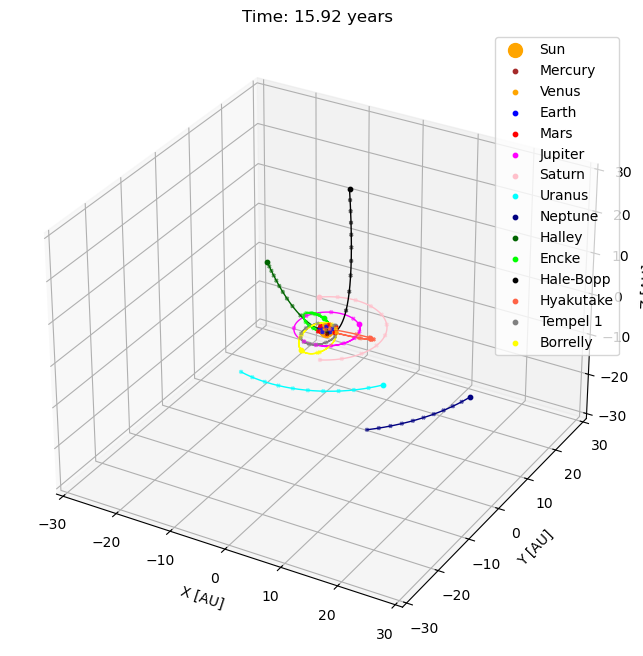

In [141]:
planet_colors = {
     "Sun": "orange",
     "Mercury": "brown",
     "Venus": "orange",
     "Earth": "blue",
     "Mars": "red", # "#c1440e",
     "Jupiter": "magenta",
     "Saturn": "pink",       
     "Uranus": "cyan",
     "Neptune": "navy",
    "Halley":    "darkgreen",  
    "Encke":     "lime",  
    "Hale-Bopp": "black", 
    "Hyakutake": "tomato", 
    "Tempel 1":  "gray",  # muted gray
    "Borrelly":  "yellow"   # light frost white
}

colors = [planet_colors.get(b.name, "#777777") for b in bodies+comets+bodies_]

plot_3d_orbits(bodies=bodies+comets, t_max=100,dt_step_marker=10,max_range=30,colors=colors)




In [142]:
evolve_in_fixed_potential(bodies=bodies_,potential=kepler_potential,field=kepler_field,hessian=kepler_hessian,time=300,eta=0.003,) 


Evolving system: 100%|████████████████████| 300.0/300 [01:29<00:00,  3.36time/s]


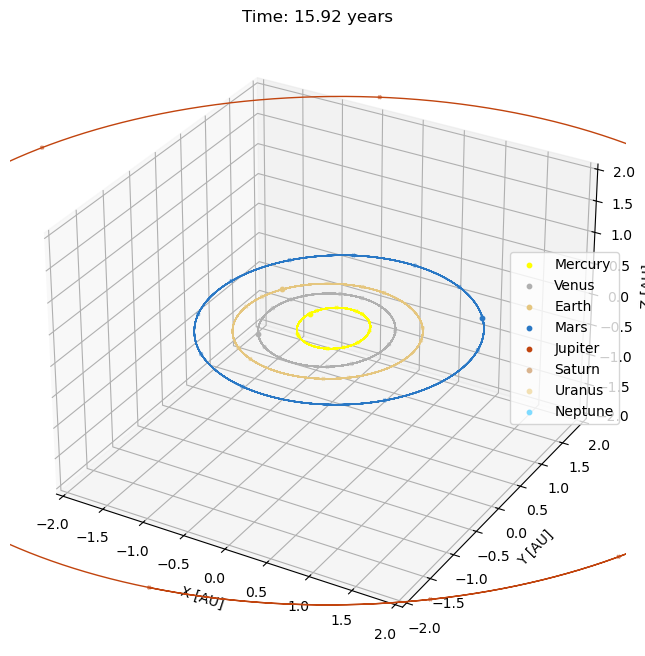

In [50]:

plot_3d_orbits([bodies[0]]+bodies_, t_max=100,dt_step_marker=10,max_range=2,colors=colors)

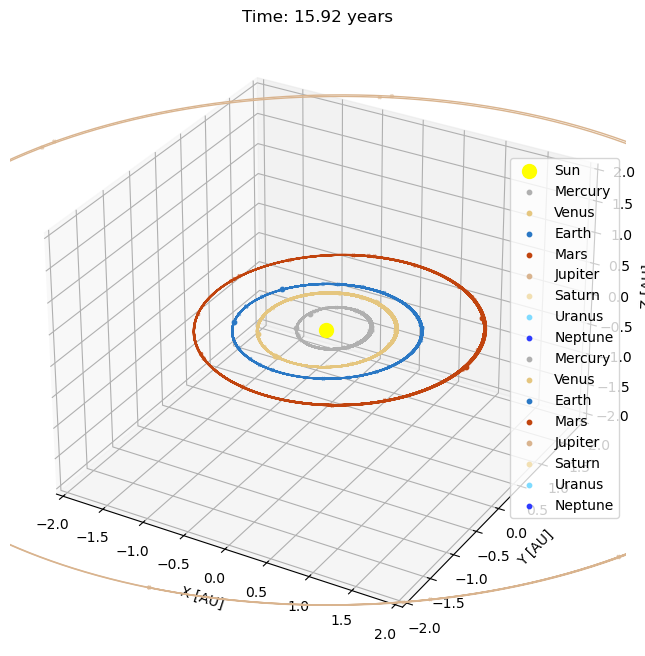

In [51]:
plot_3d_orbits(bodies+bodies_, t_max=100,dt_step_marker=10,max_range=2,colors=colors)

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_orbits(bodies, 
                   t_max, 
                   dt_step_marker=None,
                   max_range=None,
                   figsize=(10,8), 
                   colors=None, 
                   marker_size=None):
    """
    Plot 3D orbits of multiple bodies up to a given time t_max.
    """

    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')

    # --- Color handling (FIXED) ---

    if colors is None:
        # Option 1: qualitative colormap (good for up to 10 bodies)
        cmap = plt.cm.get_cmap('tab10', len(bodies))
        colors = [cmap(i) for i in range(len(bodies))]
        
    all_positions = []

    for i, b in enumerate(bodies):
        times = np.asarray(b.t)
        positions = np.asarray(b.x)

        idx_max = np.searchsorted(times, t_max, side='right')
        positions = positions[:idx_max]

        if len(positions) == 0:
            continue

        all_positions.append(positions)

        # Orbit line
        ax.plot(
            positions[:,0],
            positions[:,1],
            positions[:,2],
            lw=1,
            color=colors[i]
        )

        # --- Markers along orbit every dt_step_marker ---
        if dt_step_marker is not None:
            n_markers = int(t_max / dt_step_marker)
            marker_indices = [np.digitize(k*dt_step_marker,times)-1 for k in range(n_markers)]
            
            ax.scatter(
                positions[marker_indices,0],
                positions[marker_indices,1],
                positions[marker_indices,2],
                marker='x',
                s=5,
                color=colors[i],
                alpha=0.6
            )

        
        # Marker size
        if marker_size is None:
            size = max(10, 100 * np.sqrt(b.mass))
        else:
            size = marker_size

        # Final position marker
        ax.scatter(
            positions[-1,0],
            positions[-1,1],
            positions[-1,2],
            s=size,
            color=colors[i],
            marker='o',
            label=b.name or f"Body {i}"
        )

    # Labels and legend
    ax.set_xlabel('X [AU]')
    ax.set_ylabel('Y [AU]')
    ax.set_zlabel('Z [AU]')
    ax.legend()

    # Equal aspect ratio
    all_positions = np.concatenate(all_positions)
    mid = [0,0,0]
    if max_range is None:
        max_range = (all_positions.max(axis=0) - all_positions.min(axis=0)).max() / 2
        mid = (all_positions.max(axis=0) + all_positions.min(axis=0)) / 2
    
    ax.set_xlim(mid[0] - max_range, mid[0] + max_range)
    ax.set_ylim(mid[1] - max_range, mid[1] + max_range)
    ax.set_zlim(mid[2] - max_range, mid[2] + max_range)

    if t_max > year_IU:
        ax.set_title(f"Time: {t_max/year_IU:.2f} years")
    else:
        ax.set_title(f"Time: {t_max/day_IU:.2f} days")

    plt.show()



In [67]:
def plot_projected_orbits(bodies, 
                   t_max=year_IU, 
                   time=None,
                   planets=[],
                   observer='Earth',
                   unwrap=False,
                   dt_step_marker=None,
                   max_range=None,
                   figsize=(10,8), 
                   colors=None, 
                   marker_size=None):

    if time: unwrap = False

    fig,ax = plt.subplots(figsize=(10,10))


    j = 0
    selected_bodies = []
    for i,b in enumerate(bodies): 
        if b.name == observer:
            j = i
        if b.name in planets:
            selected_bodies.append(b)
    if len(selected_bodies) == 0: 
        selected_bodies = bodies.copy()  # make a copy
        selected_bodies.pop(j)           # remove element at index j

    idx_min = 0
    if time: t_max = time
    idx_max = np.searchsorted(bodies[0].t, t_max, side='right')
    if time: idx_min = idx_max - 1
    
    obs_x = bodies[j].x
    for b in selected_bodies:
        theta_array = []
        phi_array = []
        for i in range(idx_min,idx_max):
            vector = b.x[i] - obs_x[i]
            r = np.linalg.norm(vector)
            theta = np.arcsin(vector[2]/r) * 180/np.pi
            phi = np.arctan2(vector[1], vector[0]) + np.pi
            theta_array.append(theta)
            phi_array.append(phi)

        phi_array = np.array(phi_array)
        if unwrap:
            phi_array = np.unwrap(phi_array)                  # unwrap across discontinuities
        phi_array *= 180/np.pi  # to degrees

        s = 20 if time else 0.5
        ax.scatter(phi_array,theta_array,s=s)
        if not unwrap:
            ax.set_xlim(0,360)
        ax.set_ylim(-90,90)
        ax.set_xlabel('RA [deg]')
        ax.set_ylabel('DEC [deg]')
        if t_max > year_IU:
            ax.set_title(f"Time: {t_max/year_IU:.2f} years")
        else:
            ax.set_title(f"Time: {t_max/day_IU:.2f} days")
    plt.show()

    

In [68]:
for i in range(2,3):
    print(i)

2


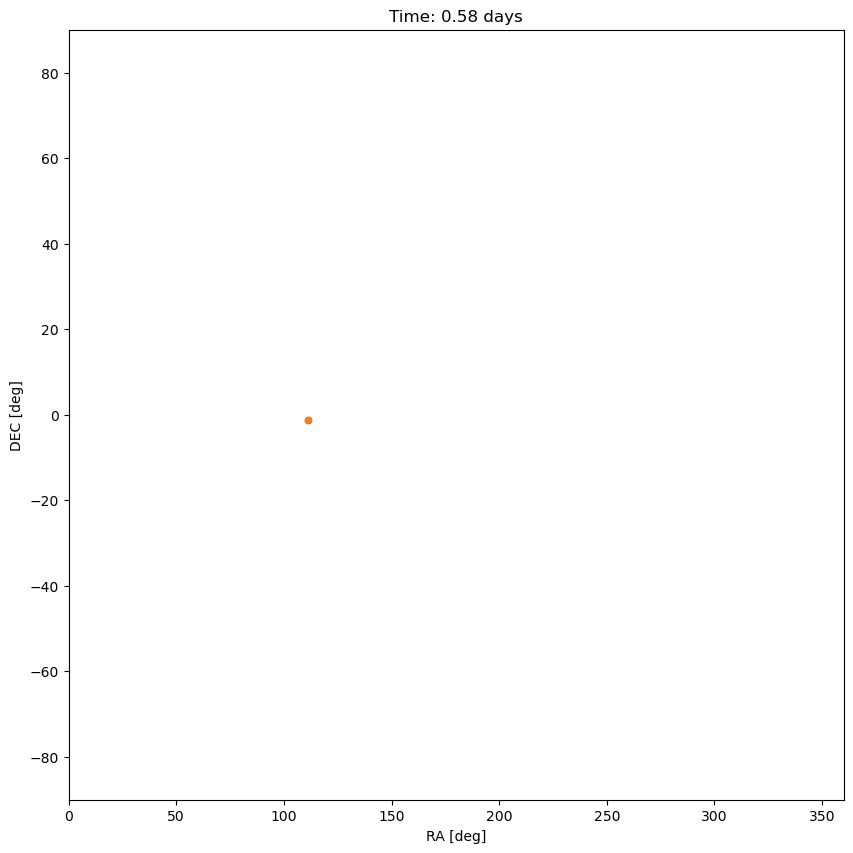

In [74]:
plot_projected_orbits(bodies=bodies+bodies_, 
                   t_max=100, 
                    time =  0.01,
                   planets=['Jupiter'],
                    unwrap=True,
                   observer='Earth',
                   dt_step_marker=None,
                   max_range=None,
                   figsize=(10,8), 
                   colors=None, 
                   marker_size=None)
    

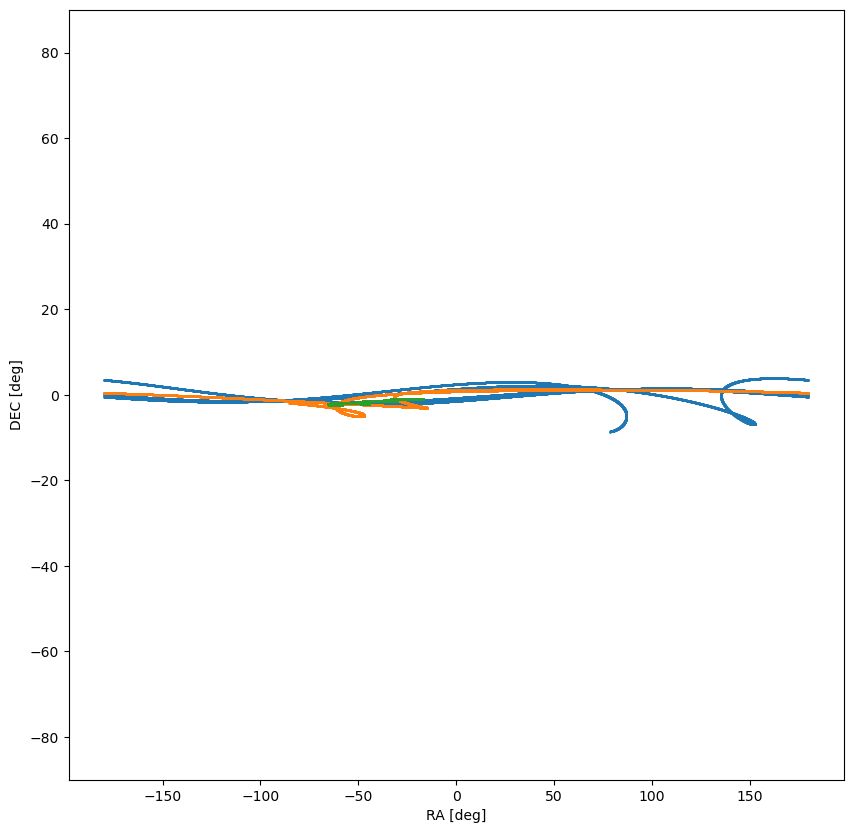

In [42]:
plot_projected_orbits(bodies=bodies_, 
                   t_max=20, 
                   planets=['Venus','Mars','Saturn',''],
                   observer='Earth',
                   dt_step_marker=None,
                   max_range=None,
                   figsize=(10,8), 
                   colors=None, 
                   marker_size=None)

# The discovery of Neptune 

Uranus’ motion didn’t exactly match predictions from Newton’s law of gravitation, which for a single planet around the Sun is:

1. Compute Uranus’ expected motion from Sun alone
2. Include perturbations from Jupiter & Saturn (and minor planets if needed)
3. Compare to observations
4. Compute residuals → attributed to unknown planet
5. Solve for orbit & mass of new planet using perturbation theory

$$\text{Residual}=\text{Observed motion}−\text{Predicted motion from Sun} + \text{known planets}$$